In [1]:
from spatial_models import *
from spatial_indicators import *
from spatial_plotting import *

In [2]:
model = LocalPositiveFeedbackModel(size=50)
R = np.arange(2, 0.8, -0.02)

# Load Simulation Snapshots

In [3]:
load = False  # set to True to load previous simulation results

if load:
    data = load_data('Results/local_positive_model.dat')
    snapshots1, snapshots2, snapshots3, snapshots4, snapshots5, snapshots6 = data

# Effects of Noise

## Additive Noise

I simulated the model at different levels of additive noise, where the noise does not depend on the variable values.

In [4]:
model.noise = "additive"
time_steps = 100
warm_up = 100
sigma_B = [0.01, 0.1, 0.25]

### $\sigma_B=0.01$

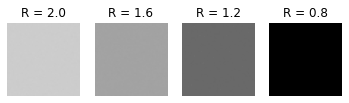

In [5]:
if not load:
    model.sigma_B = sigma_B[0]
    snapshots1 = parameter_change(model, R, "R", time_steps, warm_up)
plot_snapshots(snapshots1, [2, 1.6, 1.2, 0.8], "R", vmin=0, vmax=10)

### $\sigma_B=0.1$

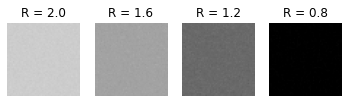

In [6]:
if not load:
    model.sigma_B = sigma_B[1]
    snapshots2 = parameter_change(model, R, "R", time_steps, warm_up)
plot_snapshots(snapshots2, [2, 1.6, 1.2, 0.8], "R", vmin=0, vmax=10)

### $\sigma_B=0.25$

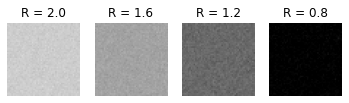

In [7]:
if not load:
    model.sigma_B = sigma_B[2]
    snapshots3 = parameter_change(model, R, "R", time_steps, warm_up)
plot_snapshots(snapshots3, [2, 1.6, 1.2, 0.8], "R", vmin=0, vmax=10)

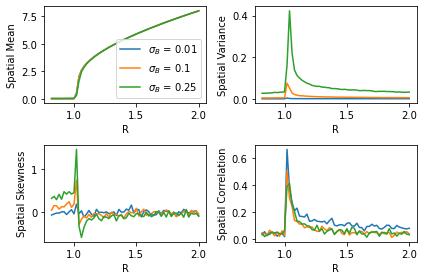

In [8]:
spatial_indicator_grid([snapshots1, snapshots2, snapshots3], "R", levels=sigma_B, level_name=r"$\sigma_B$")

Changing the level of noise did not have much effect on the model.

Spatial variance was much higher when noise was larger.

Spatial skewness peaked at larger magnitudes for larger noise.

Spatial correlation was slightly lessened for larger noise due to noise weakening the connection between cells.

## Multiplicative Noise

I simulated the model at different levels of multiplicative noise, where the noise depends linearly on the variable values.

In [9]:
model.noise = "multiplicative"
sigma_B = [0.01, 0.05, 0.1]

### $\sigma_B=0.01$

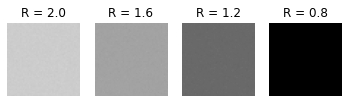

In [10]:
if not load:
    model.sigma_B = sigma_B[0]
    snapshots4 = parameter_change(model, R, "R", time_steps, warm_up)
plot_snapshots(snapshots4, [2, 1.6, 1.2, 0.8], "R", vmin=0, vmax=10)

### $\sigma_B=0.05$

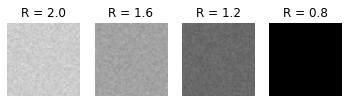

In [11]:
if not load:
    model.sigma_B = sigma_B[1]
    snapshots5 = parameter_change(model, R, "R", time_steps, warm_up)
plot_snapshots(snapshots5, [2, 1.6, 1.2, 0.8], "R", vmin=0, vmax=10)

### $\sigma_B=0.1$

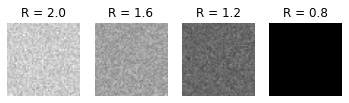

In [12]:
if not load:
    model.sigma_B = sigma_B[2]
    snapshots6 = parameter_change(model, R, "R", time_steps, warm_up)
plot_snapshots(snapshots6, [2, 1.6, 1.2, 0.8], "R", vmin=0, vmax=10)

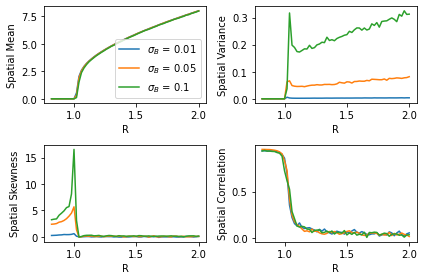

In [13]:
spatial_indicator_grid([snapshots4, snapshots5, snapshots6], "R", levels=sigma_B, level_name=r"$\sigma_B$")

There was no difference in the spatial mean for multiplicative noise compared to additive noise.

The spatial variance decreased as rainfall value increased with multiplicative noise; this is due to noise decreasing along with the decreasing vegetation. The spatial variance also exhibited peaks just before the tipping point like with additive noise.

The spatial skewness peaked at much larger values after the tipping point with multiplicative noise.

The spatial correlation stayed high, implying an almost uniform state, after the tipping point with multiplicative noise. This is because the vegetation has decreased to zero, meaning there is no noise.

# Duration of Run

## $R=1.5$

In [14]:
model.noise = "additive"
model.sigma_B = 0.25
time_steps = 200
initial = np.arange(1, 8)

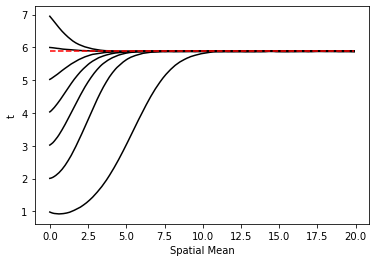

In [15]:
model.R = 1.5
plot_time_simulations(model, initial, time_steps)

## $R=1.4$

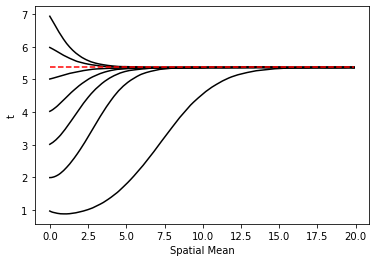

In [16]:
model.R = 1.4

plot_time_simulations(model, initial, time_steps)

## $R=1.3$

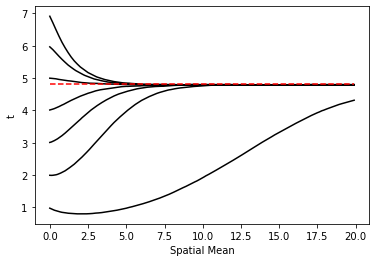

In [17]:
model.R = 1.3

plot_time_simulations(model, initial, time_steps)

## $R=1.2$

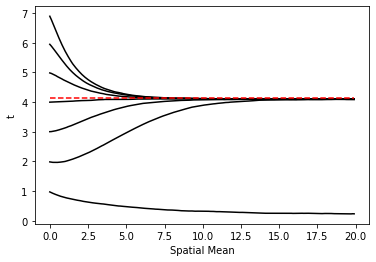

In [18]:
model.R = 1.2

plot_time_simulations(model, initial, time_steps)

## $R=1.1$

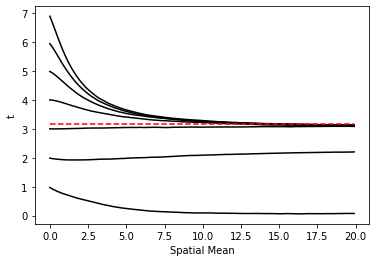

In [19]:
model.R = 1.1

plot_time_simulations(model, initial, time_steps)

I simulated the system from different initial conditions for decreasing values of $R$ towards the critical transition.

Further from the critical transition, the system recovers fairly quickly and symmetrically from both directions.  As we approach the critical transition, recovery is slower and the system starts recovering slower from below than above due to the increased attraction towards the desert equilibrium. At low enough initial values, the system goes to the desert state.

# Equilibria

In [20]:
bifurcation = find_bifurcation(model, 2, 0.8, -0.1, "R", 1.e-4)
print(f"Bifurcation at R = {bifurcation:.2f}")

Bifurcation at R = 1.07


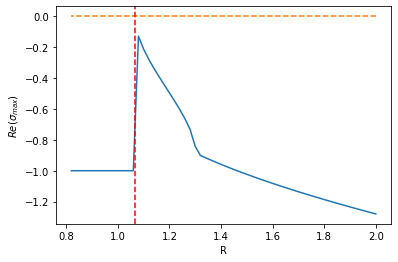

In [21]:
fig, ax = plt.subplots()
plot_max_eigenvalues(ax, model, R, "R")
ax.axvline(bifurcation, linestyle='--', color="red")

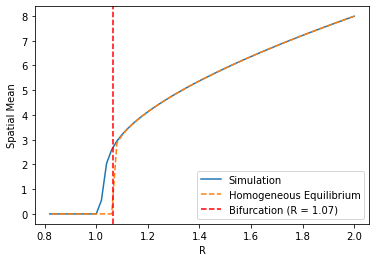

In [22]:
fig, ax = plt.subplots()
plot_spatial_indicator(ax, snapshots1, "mean", "R")
plot_equilibria(ax, model, R, "R")
ax.axvline(bifurcation, linestyle='--', color="red")
ax.legend(["Simulation", "Homogeneous Equilibrium", f"Bifurcation (R = {bifurcation:.2f})"])

I plotted the simulation results against the homogeneous equilibrium. The simulation closely followed the homogeneous equilibrium, due to the relative homogeneous behaviour of the model.

The simulation took some time for vegetation to drop to zero after the bifurcation point at $R=1.07$.

# Save Simulation Snapshots

In [23]:
save = False  # set to True to save current simulation results

if save:
    data = (snapshots1, snapshots2, snapshots3, snapshots4, snapshots5, snapshots6)
    save_data('Results/local_positive_model.dat', data)